# Week 5 - Vector Space Model (VSM) and Topic Modeling

Over the next weeks, we are going to re-implement Sherin's algorithm and apply it to the text data we've been working on last week! Here's our roadmap:

**Week 6 - vectorization and linear algebra**
6. Dampen: weight the frequency of words (1 + log[count])
7. Scale: Normalize weighted frequency of words
8. Direction: compute deviation vectors

**Week 7 - Clustering**
9. apply different unsupervised machine learning algorithms
    * figure out how many clusters we want to keep
    * inspect the results of the clustering algorithm

**Week 8 - Visualizing the results**
10. create visualizations to compare documents

# WEEK 5 - DATA CLEANING

## Step 1 - Data Retrieval

In [2]:
##Setup
# plot the graphs inline
%matplotlib inline

import os
import re
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [4]:
# # using glob, find all the text files in the "Papers" folder
# import glob

# files = glob.glob('./comps.txt')
# print(files)

['./comps.txt']


In [20]:
# get all the data from the text files into the "documents" list
# P.S. make sure you use the 'utf-8' encoding


with open ('./comps.txt', "r", encoding='utf-8') as f:
    comps = f.read()
print(comps)
type(comps)


 Ph.D. in Education Comprehensive Examination Reading List 
(Generals/Program-Wide) 
Last updated: 13 September 2018 
The Program-Wide (Generals) Comprehensive Exam Reading List is composed of two groups of readings: 
1. All required and optional/supplementary readings included in the S800 Proseminar syllabus for the Fall 2017 offering of the course, 
2. Readings that appear on the recently-revised concentration reading lists that were also selected for the revised Generals (Program-wide) reading list (these readings are already indicated in bold on the concentration reading lists) 

For the former, the Fall 2017 S800 Proseminar syllabus is included below and is also available on the course Canvas site. 
For the latter, see immediately below (which is unchanged since this Overlap list was posted on 1 August 2018). 
OVERLAP List 
FROM HDLT: 
Borko, H. (2004). Professional development and teacher learning: Mapping the terrain. Educational Researcher, 33(8), 3-15. 
Bransford, J. & Nation

str

In [24]:
# print the first 1000 characters of the first document to see what it 
# looks like (we'll use this as a sanity check below)
comps[:1000]

'\n Ph.D. in Education Comprehensive Examination Reading List \n(Generals/Program-Wide) \nLast updated: 13 September 2018 \nThe Program-Wide (Generals) Comprehensive Exam Reading List is composed of two groups of readings: \n1. All required and optional/supplementary readings included in the S800 Proseminar syllabus for the Fall 2017 offering of the course, \n2. Readings that appear on the recently-revised concentration reading lists that were also selected for the revised Generals (Program-wide) reading list (these readings are already indicated in bold on the concentration reading lists) \n\nFor the former, the Fall 2017 S800 Proseminar syllabus is included below and is also available on the course Canvas site. \nFor the latter, see immediately below (which is unchanged since this Overlap list was posted on 1 August 2018). \nOVERLAP List \nFROM HDLT: \nBorko, H. (2004). Professional development and teacher learning: Mapping the terrain. Educational Researcher, 33(8), 3-15. \nBransfor

## Step 2 - Data Cleaning


### Putting it all together

In [30]:
# package all of your work above into a function that cleans a given document

punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']




# replace return carriage with white space
comps = comps.replace('\n', ' ')
# remove ponctuation
for punc in punctuation: 
    comps = comps.replace(punc, ' ')
 # remove numbers
for i in range(10):
    comps = comps.replace(str(i), ' ')
# remove stop words
for stop_word in stop_words:
    comps = comps.replace(' ' + stop_word + ' ', ' ')
# remove single characters and stem the words 
comps = [x for x in comps.split() if len(x) > 2]
comps = " ".join(comps)
print(comps)

Education Comprehensive Examination Reading List Generals Program Wide Last updated September The Program Wide Generals Comprehensive Exam Reading List composed two groups readings All required optional supplementary readings included Proseminar syllabus Fall offering course Readings appear recently revised concentration reading lists also selected revised Generals Program wide reading list readings already indicated bold concentration reading lists For former Fall Proseminar syllabus included also available course Canvas site For latter see immediately unchanged since Overlap list posted August OVERLAP List FROM HDLT Borko Professional development teacher learning Mapping terrain Educational Researcher Bransford National Research Council Committee Developments Science Learning How people learn Brain mind experience school Expanded Washington National Academies Press Assigned reading Chapters Bronfenbrenner Morris The Bioecological Model Human Development Lerner Damon Eds Handbook chil

## Step 3 - Build your list of vocabulary

This list of words (i.e., the vocabulary) is going to become the columns of your matrix.

In [31]:
import math
import numpy as np

In [33]:
# create a function that takes in a list of documents
# and returns a set of unique words. Make sure that you
# sort the list alphabetically before returning it. 

def get_vocabulary(doc):
    voc=[]
    for word in doc.split():
        if word not in voc: 
            voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary (it should be 
# around 5500 words)
vocabulary = get_vocabulary(comps)
print(len(vocabulary))

1501


## Step 4 - transform your documents in to 100-words chunks

In [47]:
# create a function that takes in a list of documents
# and returns a list of 100-words chunk 
# (with a 25 words overlap between them)
# Optional: add two arguments, one for the number of words
# in each chunk, and one for the overlap

def flatten_and_overlap(docs, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_documents = []
    
    # flatten everything into one string
    flat = ""
    for doc in docs:
        flat += doc
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_documents.append(flat[low:high])
        high += overlap
    return new_list_of_documents

chunks = flatten_and_overlap(comps)
print(len(chunks[-1]))
print(len(chunks))


100
115


In [36]:
# create a for loop to double check that each chunk has 
# a length of 100
# Optional: use assert to do this check
for chunk in chunks: 
    assert(len(chunk) == 100)

# WEEK 6 - VECTOR MANIPULATION

## Step 5 - Create a word by document matrix

In [46]:
# 1) create an empty dataframe using pandas
# the number of rows should be the number of chunks we have
# the number of columns should be size of the vocabulary
import pandas as pd
df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Columns: 1501 entries, ACCOUNTS to —matters
dtypes: int64(1501)
memory usage: 1.3 MB
   ACCOUNTS  ACHIEVE  AIM  AND  ARE  ATTEMPT—VIA  Academic  Academies  \
0         0        0    0    0    0            0         0          0   
1         0        0    0    0    0            0         0          0   
2         0        0    0    0    0            0         0          0   
3         0        0    0    0    0            0         0          0   
4         0        0    0    0    0            0         0          0   

   Accountability  Administrative    ...     world  worth  would  write  \
0               0               0    ...         0      0      0      0   
1               0               0    ...         0      0      0      0   
2               0               0    ...         0      0      0      0   
3               0               0    ...         0      0      0      0   
4               0            

In [50]:
# 2) fill out the dataframe with the count of words for each document
# (use two for loops to iterate through the documents and the vocabulary)
for i,chunk in enumerate(chunks):
    for word in chunk:
        if word in vocabulary: 
            df.loc[i,word] += 1

In [54]:
# 3) Sanity check: make sure that your counts are correct
# (e.g., if you know that a words appears often in a document, check that
# the number is also high in your dataframe; and vice-versa for low counts)
df.loc[2,'education']

3

In [20]:
# 4) Putting it together: create a function that takes a list of documents
# and a vocabulary as arguments, and returns a dataframe with the counts
# of words: 
# def docs_by_words_df(chunks, vocabulary):
#     df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
#     # fill out the matrix with counts
#     for i,chunk in enumerate(chunks):
#         for word in chunk:
#             if word in df.columns: 
#                 df.loc[i,word] += 1
            
#     return df

# # call the function and check that the resulting dataframe is correct
# df = docs_by_words_df(chunks, vocabulary)
# df.loc[0,'wandering']

6

## Step 6 - Weight word frequency

In [55]:
# 5) create a function that adds one to the current cell and takes its log
# IF the value in the cell is not zero
def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0

In [56]:
# 6) use the "applymap" function of the dataframe to apply the function 
# above to each cell of the table
df_log = df.applymap(one_plus_log)

In [57]:
# 7) check that the numbers in the resulting matrix look accurate;
# print the value before and after applying the function above
print("before one + log: ", df.loc[0,'Education'])
print("after one + log: ", 1 + math.log(df.loc[0,'Education']))
print("Value in the dataframe: ", df_log.loc[0,'Education'])

before one + log:  3
after one + log:  2.09861228866811
Value in the dataframe:  2.09861228866811


## Step 7 - Matrix normalization

In [58]:
# 12) since we are working with vectors, apply the Normalizer from 
# sklearn.preprocessing to our dataframe. Print a few values 
# before and after to make sure you've applied the normalization
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_log[df_log.columns] = scaler.fit_transform(df_log[df_log.columns])
df_log[df_log.columns[500:600]]

,Tough,Treat,Trends,Tuck,Tuesday,Tuesdays,Tutorial,Tyack,UNIT,Understanding,...,another,answer,answers,anyway,appear,apply,apprenticeship,approach,approaches,appropriate
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.103484,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.102188,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.101755,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.102004,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.102133,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.101774,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [59]:
# 13) create a function that takes a dataframe as argument and where a second
# argument is the type of normalization (MinMaxScaler, Normalizer, StandardScaler)
# and returns the normalized dataframe
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

def normalize_df(df, method='Normalizer'):
    
    # choose the normalization strategy
    scaler = None
    if method == 'Normalizer': scaler = Normalizer()
    if method == 'MinMaxScaler': scaler = MinMaxScaler()
    if method == 'StandardScaler': scaler = StandardScaler()
        
    # apply the normalization
    if scaler != None:
        df[df.columns] = scaler.fit_transform(df[df.columns])

    # return the resulting dataframe
    return df

## Step 8 - Deviation Vectors

<img src="https://www.dropbox.com/s/9f73r7pk7bi7vh9/deviation_vectors.png?dl=1" />

In [61]:
# 14) compute the sum of the vectors
v_sum = np.sum(df_log.values, axis=0)

In [62]:
# 15) normalize the vector (find its average)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

v_avg = length_norm(v_sum)

In [63]:
# 16) take each vector and subtract its components along v_avg

matrix = df_log.values

for row in range(df_log.shape[0]):

    # this is one vector (row
    v_i = matrix[row,:]

    # we subtract its component along v_average
    scalar = np.dot(v_i,v_avg)
    sub = v_avg * scalar

    # we replace the row by the deviation vector
    matrix[row,:] = length_norm(v_i - sub)

In [64]:
# 17) put the code above in a function that takes in a dataframe as an argument
# and computes deviation vectors of each row (=document)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_log.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

In [65]:
df = transform_deviation_vectors(df_log)

# WEEK 7 - CLUSTERING

## Step 9 - Clustering

### Figuring out how many clusters we should pick

1) Plot the inertia of kmeans using this example from datacamp: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=6

In [66]:
##Importing what we need
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [67]:
# 1a) create a list of inertia values for k 1-10
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to the dataframe
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

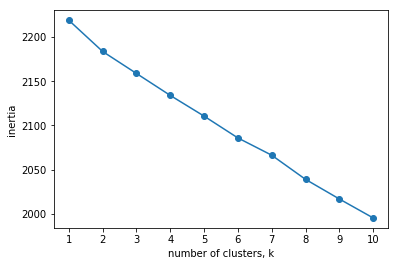

In [37]:
# 1b) plot the inertia values using matplotlib
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

1c) What can you conclude from the elbow method?
We can't use the elbow method, because there's no elbow. Basically, no clear set advantage from a certain number of clusters exists.

2) Visualize your data using T-SNE
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=11
* https://www.datacamp.com/community/tutorials/introduction-t-sne


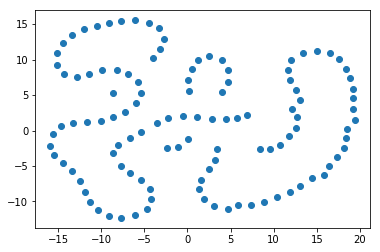

In [68]:
# 2a) plot the T-SNE graph using a learning rate of 200
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to the dataframe: tsne_features
tsne_features = model.fit_transform(df)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys)
plt.show()

2b) What can you conclude from T-SNE?

This looks like 17 clusters, some are tighter than others and some are kind of close together too.

Note: T-SNE is great, but there is also some controversy on how much you should trust this algorithm:
* [Shortcomings of T-SNE](https://stats.stackexchange.com/questions/270391/should-dimensionality-reduction-for-visualization-be-considered-a-closed-probl)
* [Limitations of T-SNE](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

### Kmeans

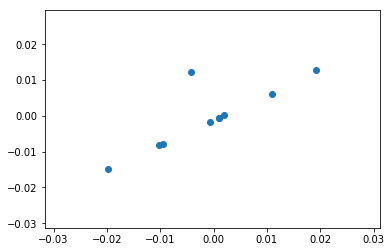

In [69]:
# 3a) apply k-means to our data with k=10 and print the first 10 words
# that are the most associated with each cluster centroids
# Hint: look at the cluster_centers_ of the KMeans object to find the centroids
model = KMeans(n_clusters=10)
df_features = model.fit(df)
centers= df_features.cluster_centers_
plt.scatter(centers[:,0], centers[:,1])



In [70]:
df_centroids = pd.DataFrame(centers, columns=df.columns)


#sort the values of the first cluster and find top 10 words
top_ten=[]
for i in range(0,10):
    words= (df_centroids.iloc[i].sort_values(ascending=False))[0:10]
    top_ten.append(words)

print(top_ten)


[What            0.106166
aims            0.094272
How             0.091532
perspectives    0.090633
educational     0.087015
potentially     0.080498
education       0.076328
different       0.072393
iPa©            0.069833
policy          0.067371
Name: 0, dtype: float64, paper         0.093250
feedback      0.049218
submission    0.046236
journal       0.045751
AND           0.044594
HOW           0.044479
day           0.043517
UNIT          0.042644
WHAT          0.041311
Day           0.040459
Name: 1, dtype: float64, New           0.119501
York          0.118178
Chicago       0.111744
Chapters      0.090676
Routledge     0.087885
education     0.087617
The           0.086070
Press         0.083903
Cambridge     0.081392
University    0.069900
Name: 2, dtype: float64, plan          0.109263
lesson        0.100443
session       0.093282
seminar       0.092177
meet          0.087249
response      0.086130
time          0.081199
teach         0.078980
leadership    0.077790
class  

In [71]:
kmeans_results = KMeans(n_clusters=10).fit(df)
for n in range (kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    centroid= kmeans_results.cluster_centers_[n]
    indices= centroid.argsort()[-10:]
    for i in indices:
        print(vocabulary[i], end=" ")
        
    print(" ")

Cluster  0 :  Course policy practice intellectual students key questions within research educational  
Cluster  1 :  comments get submission Note feedback Perspectives journal would day paper  
Cluster  2 :  Cambridge American Eds Child Behavioral Sciences Chicago Development New York  
Cluster  3 :  citation read doctoral clearly help services appropriate others support academic  
Cluster  4 :  New Harvard York Review Cambridge Assigned education Chicago Press University  
Cluster  5 :  teaching seminar discuss assigned time readings etc thinking You class  
Cluster  6 :  succeed clear expect goals final assessment mastery grades doctoral grade  
Cluster  7 :  Brain National also Learning reading development Development Educational Professional people  
Cluster  8 :  slot Dec receive analytic Due Nov final paper due exam  
Cluster  9 :  policy iPa© different education potentially educational perspectives How aims What  


### Hierarchical clustering

4) use hierarchical clustering on the data; feel free to refer to the datacamp lesson below: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=3

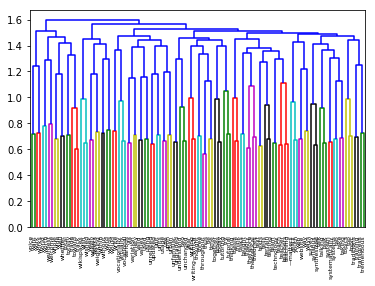

In [72]:
#4a) plot the dendogram using the link above (method = complete)
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


mergings = linkage(df, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels = df.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [73]:
#4c) we are going to use agglomerative clustering here 
# from the sklean library 

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
agclusters = cluster.fit(df)
print(agclusters)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')


In [74]:
labels = agclusters.labels_

In [75]:
# 4d) compute the center of the cluster
# unfortunately sklearn doesn't provide you with the centroids, but you can use the link below:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
near_centroid  = clf.fit( df, labels)
print(near_centroid)


NearestCentroid(metric='euclidean', shrink_threshold=None)


In [76]:
# 4e) print the top 10 words for each cluster centroid

for n in range(6):  
    print("Cluster ", n, ": ", end=" ")
    centroids = near_centroid.centroids_[n]
    indices = centroids.argsort()[-10:-1]
    for i in indices:
        print(df.columns[i], end=" ")
        
    print(" ")

Cluster  0 :  UNIT WHAT Note Sep get due analytic feedback day  
Cluster  1 :  What intellectual potentially key theoretical practice policy questions research  
Cluster  2 :  Review Chapters Assigned Cambridge New York education University Press  
Cluster  3 :  readings teaching team ask peers assigned You etc thinking  
Cluster  4 :  expectations grades help course even academic assignments grade support  
Cluster  5 :  New Assigned Brain reading The American people Chapter Educational  
